# Downside Measure

In [1]:
import pandas as pd
import numpy as np
import scipy.stats 
import risk_kit as rk
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
hfi = rk.get_hfi_returns()

c:\Users\arthu\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '31/01/1997' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
c:\Users\arthu\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '28/02/1997' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
c:\Users\arthu\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '31/03/1997' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
c:\Users\arthu\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '30/04/1997' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
c:\Users\arthu\anaconda3\lib

In [3]:
hfi.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275


## Semi-deviation

In [4]:
hfi.std(ddof=0)

Convertible Arbitrage     0.016536
CTA Global                0.023290
Distressed Securities     0.017009
Emerging Markets          0.032476
Equity Market Neutral     0.008115
Event Driven              0.016712
Fixed Income Arbitrage    0.011517
Global Macro              0.014694
Long/Short Equity         0.019897
Merger Arbitrage          0.009600
Relative Value            0.011462
Short Selling             0.047655
Funds Of Funds            0.015536
dtype: float64

In [5]:
#Just compute S.D. of negative returns
#What the module in our kit does is eqaul to hfi[hfi<0].std(ddof=0)
rk.semideviation(hfi)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

In [6]:
#Here we use another formular: Compute the S.D. for the returns below average
rk.semideviation2(hfi)

Convertible Arbitrage     0.019800
CTA Global                0.022163
Distressed Securities     0.020214
Emerging Markets          0.037962
Equity Market Neutral     0.009568
Event Driven              0.019756
Fixed Income Arbitrage    0.015972
Global Macro              0.012588
Long/Short Equity         0.021899
Merger Arbitrage          0.011257
Relative Value            0.013649
Short Selling             0.042020
Funds Of Funds            0.016471
dtype: float64

## VaR and CVaR
- Historic VaR
- Parametric VaR - Gaussian
- Modified Cornish-Fisher VaR

In [7]:
#Historic VaR
#What is the Value at Risk at 5% level?
#That is to say, what is the percentile number of that worst 5%?
np.percentile(hfi, 5, axis=0)

array([-0.01576, -0.03169, -0.01966, -0.04247, -0.00814, -0.02535,
       -0.00787, -0.01499, -0.02598, -0.01047, -0.01174, -0.06783,
       -0.02047])

That is to say, there's a 5% chance that in any give month, we gonna lose approx. 1.576% or worse for the first one (Convertible Arbitrage).  
We can make the result more clearly.

In [8]:
#We've add these code to our module kit file
def var_historic(r, level=5):
    """
    VaR historic
    """
    if isinstance(r, pd.DataFrame):  # Check if r is a Dataframe, if True then it's goona apply var_historic on every column of that Dataframe
        return r.aggregate(var_historic, level= level)
    elif isinstance(r, pd.Series): # Next time r should not be a Datafrmae(it's a Series now), so we can compute the percentile here
        return -np.percentile(r, level)
    else: 
        raise TypeError('Expected r to be a DataFrame or Series')

In [9]:
var_historic(hfi)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

In [10]:
rk.var_historic(hfi)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

In [11]:
#We have a function to model the normal distribution in scipy.stats
scipy.stats.norm.ppf(0.05) #ppf stands for percent point function and returns a z-score

-1.6448536269514729

In [12]:
#Compute VaR at 5% level
z = scipy.stats.norm.ppf(0.05)
-(hfi.mean() + z*hfi.std(ddof=0))

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

In [13]:
#Use our own code in the kit to test the answer
rk.var_gaussian(hfi)

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

In [14]:
#Cornish-Fisher and make a comparison
var_list=[rk.var_gaussian(hfi), rk.var_gaussian(hfi, modified= True), rk.var_historic(hfi)]
comparison = pd.concat(var_list, axis=1)
comparison.columns=['Gaussian', 'Cornish-Fisher', 'Historic']
comparison


,Gaussian,Cornish-Fisher,Historic
Convertible Arbitrage,0.021691,0.025166,0.01576
CTA Global,0.034235,0.033094,0.03169
Distressed Securities,0.021032,0.025102,0.01966
Emerging Markets,0.047164,0.053011,0.04247
Equity Market Neutral,0.008850,0.010734,0.00814
Event Driven,0.021144,0.025516,0.02535
Fixed Income Arbitrage,0.014579,0.017881,0.00787
Global Macro,0.018766,0.013581,0.01499
Long/Short Equity,0.026397,0.027935,0.02598
Merger Arbitrage,0.010435,0.012612,0.01047


<AxesSubplot:>

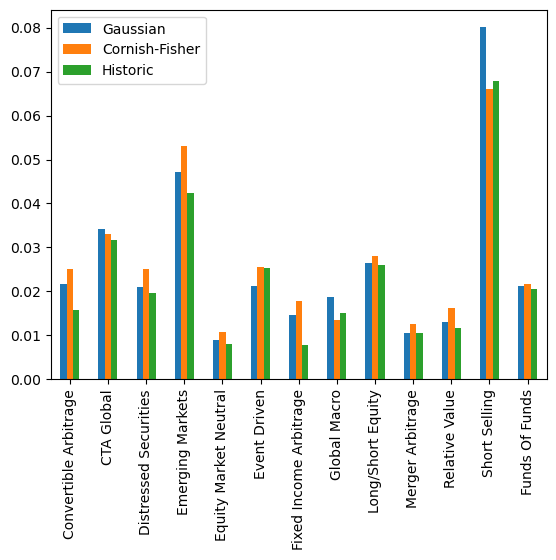

In [15]:
comparison.plot.bar()

In [16]:
#CVaR
#We've add these code to our module kit file
def cvar_historic(r, level=5):
    """
    Compute the Conditional VaR of a Series or Dataframe
    """
    if isinstance(r, pd.Series):
        is_beyond = r <= -var_historic(r, level=level) #Find me all the returns < the historic VaR
        return -r[is_beyond].mean() #Then return the conditional mean 
    elif isinstance(r, pd.DataFrame):
        return r.aggregate(cvar_historic, level= level)
    else:
        raise TypeError('Expected r to be a Dataframe or Series')

In [17]:
rk.cvar_historic(hfi)

Convertible Arbitrage     0.036550
CTA Global                0.041264
Distressed Securities     0.036429
Emerging Markets          0.072364
Equity Market Neutral     0.016879
Event Driven              0.038336
Fixed Income Arbitrage    0.028257
Global Macro              0.020629
Long/Short Equity         0.041943
Merger Arbitrage          0.019143
Relative Value            0.024650
Short Selling             0.096821
Funds Of Funds            0.033207
dtype: float64

Take Convertible Arbitrage as an example: We have a average 3.6% loss in a month in the worst 5% cases.